In [18]:
import time, h5py, sys, numpy as np
import pandas as pd, glob
from pycbc import conversions

In [19]:
import matplotlib as mpl
import matplotlib.pyplot as plt

# PLOTTING OPTIONS
fig_width_pt = 3*246.0  # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inch
golden_mean = (np.sqrt(5)-1.0)/2.0         # Aesthetic ratio
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height = fig_width*golden_mean      # height in inches
fig_size =  [fig_width,fig_height]

params = { 'axes.labelsize': 24,
          'font.family': 'serif',
          'font.serif': 'Computer Modern Raman',
          'font.size': 24,
          'legend.fontsize': 20,
          'xtick.labelsize': 24,
          'ytick.labelsize': 24,
          'axes.grid' : True,
          'text.usetex': True,
          'savefig.dpi' : 100,
          'lines.markersize' : 14,
          'figure.figsize': fig_size}

mpl.rcParams.update(params)

In [20]:
files = glob.glob('result/match*.csv')

In [21]:
result = None
for f in files:
    df = pd.read_csv(f, index_col=0)
    if result is None:
        result = df
    else:
        result = pd.concat([result,df])

In [22]:
result

injmc   injspin     lambda1     lambda2     mass1     mass2    spin1z  \
0   1.193665  0.224612   73.376210   95.953564  1.301710  1.436518  0.047521   
1   0.948527 -0.904261   13.611118   24.055491  1.148790  1.038809 -0.048414   
2   1.450075 -0.283345    0.000000    0.000000  1.206951  2.350909 -0.027185   
3   1.458752 -0.336512    0.000000    0.000000  1.300812  2.187299  0.002268   
4   1.065563 -0.858388  132.351981  104.927322  1.015780  1.494399 -0.044926   
..       ...       ...         ...         ...       ...       ...       ...   
95  1.145887 -0.047568  214.244743  281.282640  1.663543  1.052717  0.014630   
96  1.349349 -0.763026    0.000000    0.000000  1.073213  2.304198 -0.017468   
97  1.153701 -0.158383  240.371183  141.548217  1.768381  1.010833 -0.039820   
98  1.440069  0.348874    0.000000    0.000000  1.141598  2.469984  0.023708   
99  0.923594 -0.639191  118.552797  109.767161  1.104760  1.023877 -0.048732   

      spin2z  max_match  
0   0.043297   0.688770  
1  -0.043357   0.154044  
2  -0.263873   0.992147  
3  -0.435097   0.980480  
4  -0.047166   0.162371  
..       ...        ...  
95 -0.033163   0.980720  
96 -0.838352   0.978818  
97 -0.047165   0.849892  
98  0.561386   0.988185  
99 -0.049153   0.180904  

[10000 rows x 9 columns]

In [26]:
result.to_csv('combined_ff.csv')

In [23]:
mc = result['injmc'].values
chieff = result['injspin'].values
ff = result['max_match'].values

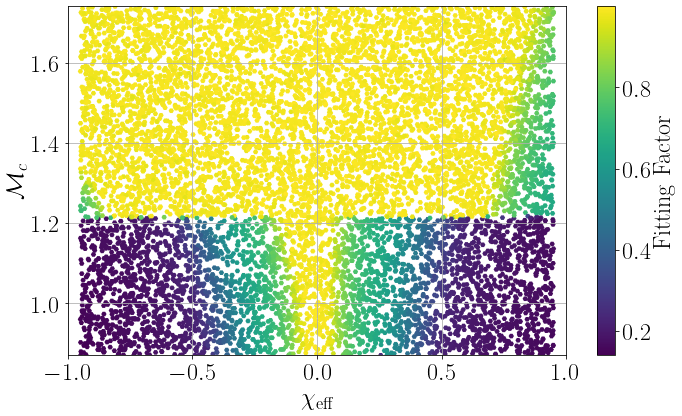

In [29]:
fig = plt.figure() 
ax = fig.add_subplot(111) 

cs = ax.scatter(chieff, mc, c=ff, alpha=1,marker='H',s=28,cmap='viridis', edgecolors='None')
cbar = fig.colorbar(cs,label=r'Fitting Factor')
'''
triang = tri.Triangulation(q, sim[:,2])
interpolator = tri.LinearTriInterpolator(triang, sim[:,3])

xi = np.linspace(1, 4,100)
yi = np.linspace(0, 0.2, 100)
Xi, Yi = np.meshgrid(xi, yi)
zi = interpolator(Xi, Yi)

z2 = ndimage.gaussian_filter(zi, sigma=0.1, order=0)
bs = ax.contour(xi, yi, z2, levels=[0.80,0.97], linewidths=1, alpha=1,colors='black')
ax.clabel(bs,[bs.levels[0]],fmt = r'80 \%%')
ax.clabel(bs,[bs.levels[1]],fmt = r'97 \%%')


yticks = mtick.PercentFormatter(xmax=1) 
cbar.ax.yaxis.set_major_formatter(yticks) 
cbar.ax.set_ylim(np.min(sim[:,3]),1)
cbar.ax.yaxis.set_major_locator(plt.MaxNLocator(3))
'''
ax.set_xlabel('$\chi_\mathrm{eff}$')
ax.set_ylabel('$\mathcal{M}_c$')
ax.set_xlim(-1,1)
ax.set_ylim(1/2**0.2,2/2**0.2)
#ax.yaxis.set_major_locator(plt.MaxNLocator(10))
plt.tight_layout() 

fig.savefig('ff.pdf')

In [27]:
2/2**(0.2)

1.7411011265922482

In [30]:
from pycbc import conversions

In [31]:
conversions.mchirp_from_mass1_mass2(2,1)

1.2167286837864115